### Imports

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [118]:
data = pd.read_csv("Ecommerce - UK Retailer.csv")

### data description

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [120]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [121]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [122]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

# Explanatory Data Analysis



### a. Boxplot – All Numeric Variables

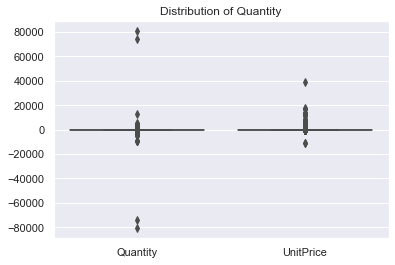

In [123]:
sns.boxplot(data=data[["Quantity","UnitPrice"]])
plt.title("Distribution of Quantity")
plt.show()

### b. Histogram – All Numeric Variables

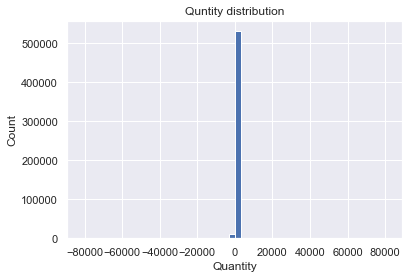

In [131]:
data["Quantity"].hist(bins=50,range=[data["Quantity"].min(),data["Quantity"].max()])
plt.title("Quntity distribution")

plt.xlabel("Quantity")
plt.ylabel("Count")
plt.show()

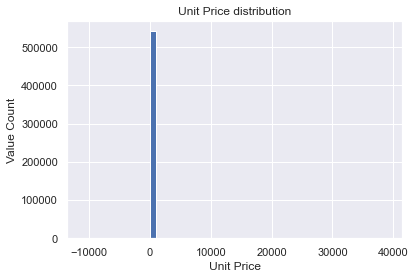

In [132]:
data["UnitPrice"].hist(bins=50,range=[data["UnitPrice"].min(),data["UnitPrice"].max()])
plt.title("Unit Price distribution")

plt.xlabel("Unit Price")
plt.ylabel("Value Count")
plt.show()

For both the numerical values most the the values are accumulated in a small range while the ouliers goes to a very large range

### d. Aggregation for all numerical Columns

In [135]:
data['Quantity'].sum()

5176450

In [136]:
data['UnitPrice'].sum()

2498803.974

### e. Unique Values across all columns

In [137]:
unique = data.nunique()

In [138]:
unique

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

### f. Duplicate values across all columns

In [139]:
duplicate = data[data.duplicated()]

In [140]:
duplicate

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


### g. Correlation – Heatmap - All Numeric Variables

In [141]:
corr = data.drop("CustomerID",axis=1).corr()

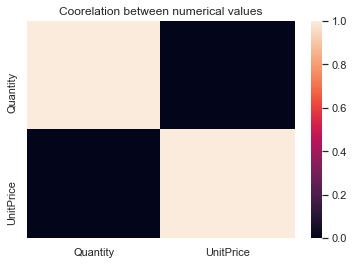

In [142]:
sns.heatmap(corr)
plt.title("Coorelation between numerical values")
plt.show()

### h. Regression Plot - All Numeric Variables

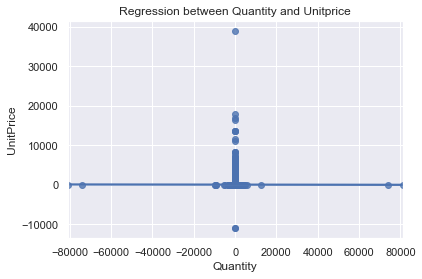

In [143]:
sns.regplot(x=data["Quantity"],y=data["UnitPrice"],data=data)
plt.title("Regression between Quantity and Unitprice")
plt.show()

Both the numerical values quantity and UnitPrice are independent of each other so there is no regression between them

### i. Bar Plot – Every Categorical Variable vs every Numerical Variable

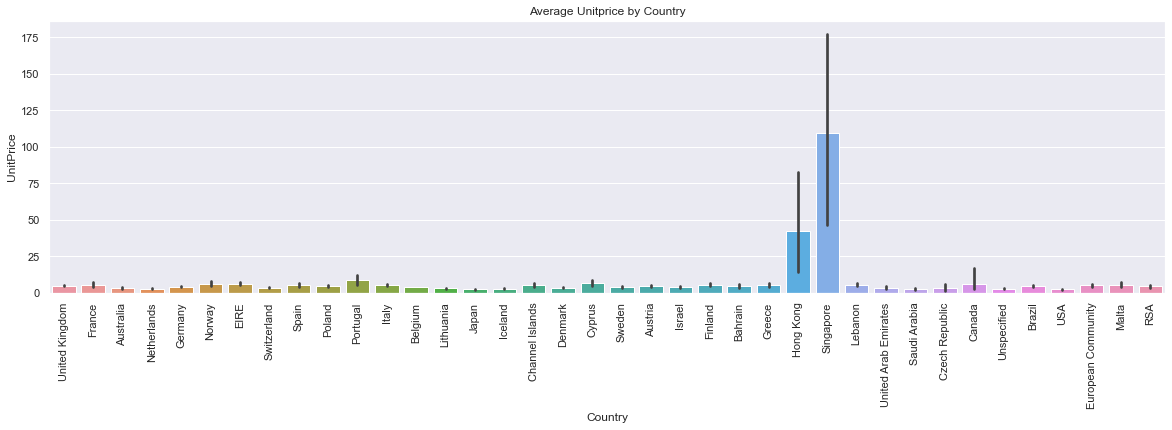

In [144]:
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=data,x="Country",y="UnitPrice")
plt.title("Average Unitprice by Country")
plt.xticks(rotation=90)
plt.show()

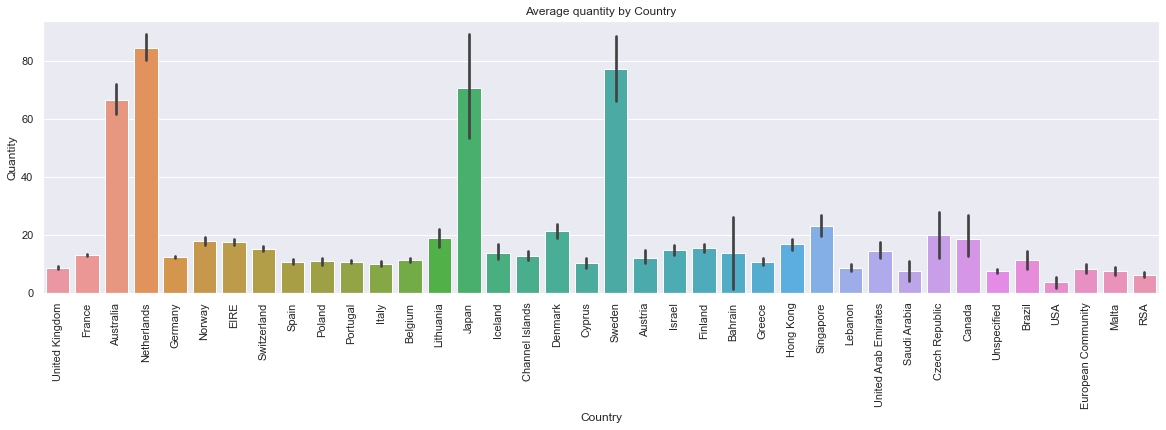

In [145]:
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=data,x="Country",y="Quantity")
plt.title("Average quantity by Country")
plt.xticks(rotation=90)
plt.show()

### j. Pair plot - All Numeric Variables

Since there is no relation between quantity and UnitPrice. Pairplot is not possible

### k. Line chart to show the trend of data - All Numeric/Date Variables

In [146]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

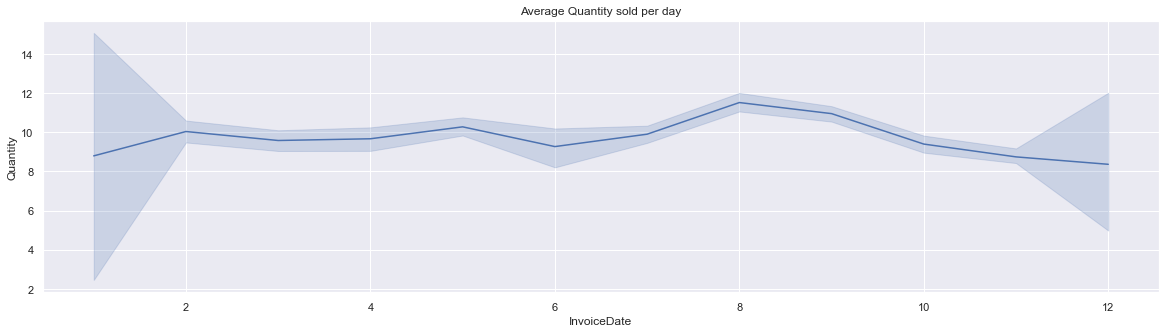

In [147]:
sns.lineplot(x=data["InvoiceDate"].dt.month,y=data["Quantity"])
plt.title("Average Quantity sold per day")
plt.show()

### l. Plot the skewness - All Numeric Variables

### 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode)

In [148]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [149]:
data[data["CustomerID"].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [150]:
data["CustomerID"].fillna(method="ffill",inplace=True)

In [151]:
data.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [152]:
data.dropna(inplace=True)

In [153]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [154]:
data.shape

(540455, 8)

### 3. Remove duplicate rows

In [155]:
data.drop(duplicate.index,inplace=True)

In [156]:
data.shape

(535187, 8)

### 4. Remove rows which have negative values in Quantity column

In [157]:
neg = data[data["Quantity"] < 0]

In [158]:
neg

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [159]:
data.drop(neg.index,inplace=True)

In [160]:
data.shape

(525462, 8)

In [161]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

### 5. Add the columns - Month, Day and Hour for the invoice

In [162]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [163]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [164]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [165]:
data["Month"] = data["InvoiceDate"].dt.month
data["Day"] = data["InvoiceDate"].dt.day
data["Hour"] = data["InvoiceDate"].dt.hour

In [166]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,8


### 6. How many orders made by the customers?

In [167]:
cust_ord = data.groupby(["CustomerID"]).count()

In [168]:
cust_ord[["InvoiceNo"]]

,InvoiceNo
CustomerID,
12346.0,1
12347.0,182
12348.0,206
12349.0,73
12350.0,17
...,...
18280.0,325
18281.0,7
18282.0,12


In [169]:
cust_ord["InvoiceNo"].sum()

525462

In [170]:
cust_ord.sort_values(by="InvoiceNo",ascending=False,inplace=True)

### 7. TOP 5 customers with higher number of orders

In [171]:
cust_ord["InvoiceDate"].head(5)

CustomerID
17841.0    8306
14911.0    7402
12748.0    5888
14096.0    5394
14606.0    3844
Name: InvoiceDate, dtype: int64

### 8. How much money spent by the customers?

In [172]:
data["Total bill"] = data["Quantity"] * data["UnitPrice"]

In [173]:
data["Total bill"].sum()

10619986.684

### 9. TOP 5 customers with highest money spent

In [174]:
moneyspent = data.groupby("CustomerID").sum()

In [175]:
moneyspent.sort_values(by="Total bill",ascending=False,inplace=True)

In [176]:
moneyspent["Total bill"].head(5)

CustomerID
14646.0    282777.64
18102.0    275609.41
17450.0    194432.39
16446.0    168472.50
14911.0    158806.24
Name: Total bill, dtype: float64

### 10. How many orders per month

In [177]:
orders_by_month = data[["InvoiceNo","Month"]].groupby("Month").count()
orders_by_month

,InvoiceNo
Month,
1,34073
2,26936
3,35537
4,28894
5,36002
6,35755
7,38411
8,34305
9,48924


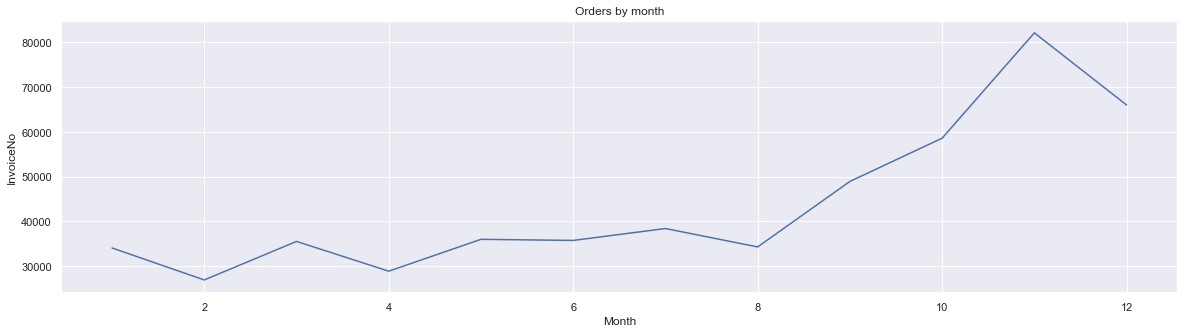

In [178]:
g = sns.lineplot(data = orders_by_month, x="Month",y="InvoiceNo")
plt.title("Orders by month")
plt.show()

### 11. How many orders per day?

In [179]:
orders_by_day = data[["InvoiceNo","Day"]].groupby("Day").count()
orders_by_day

,InvoiceNo
Day,
1,17014
2,16221
3,14027
4,19008
5,21446
6,23214
7,22339
8,23902
9,17627


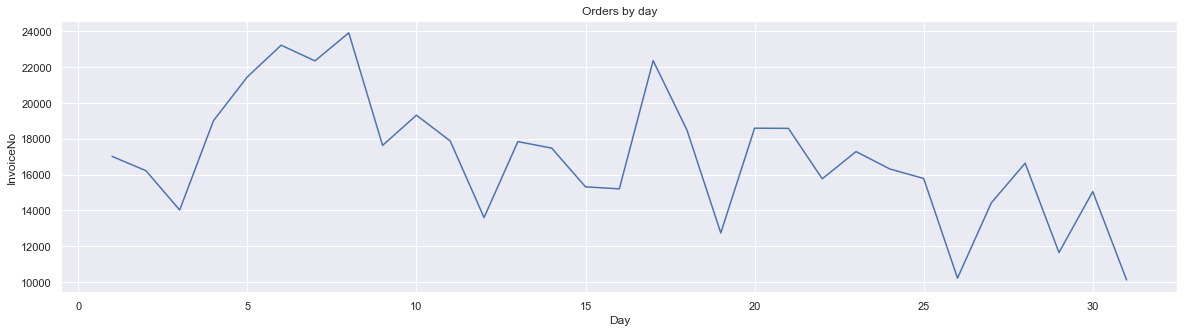

In [180]:
g = sns.lineplot(data = orders_by_day, x="Day",y="InvoiceNo")
plt.title("Orders by day")
plt.show()

### 12. How many orders per hour?

In [181]:
orders_by_hour = data[["InvoiceNo","Hour"]].groupby("Hour").count()
orders_by_hour

,InvoiceNo
Hour,
6,1
7,379
8,8801
9,33701
10,47616
11,55544
12,76015
13,70023
14,65300


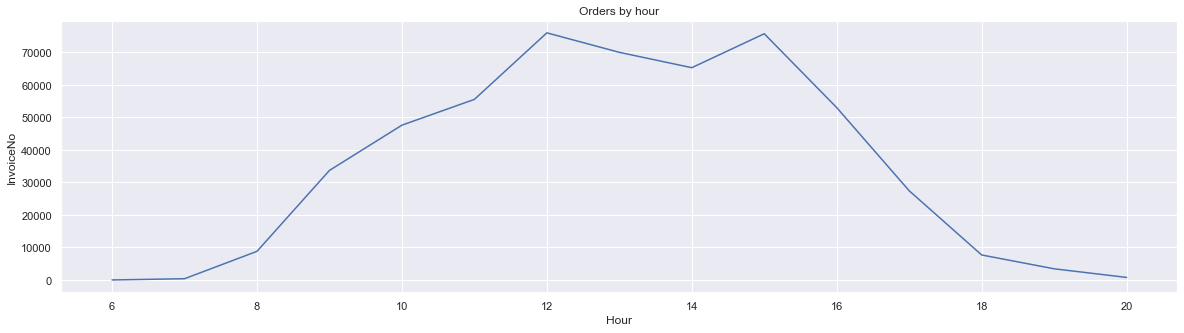

In [182]:
g = sns.lineplot(data = orders_by_hour, x="Hour",y="InvoiceNo")
plt.title("Orders by hour")
plt.show()

### 13. How many orders for each country?

In [183]:
orders_by_country = data[["InvoiceNo","Country"]].groupby("Country").count()
orders_by_country

,InvoiceNo
Country,
Australia,1184
Austria,398
Bahrain,18
Belgium,2031
Brazil,32
Canada,151
Channel Islands,747
Cyprus,603
Czech Republic,25


In [184]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Month                   int64
Day                     int64
Hour                    int64
Total bill            float64
dtype: object

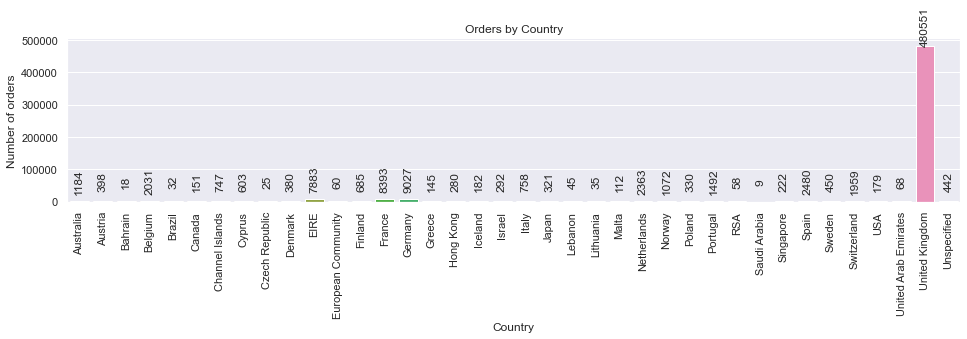

In [185]:
plt.figure(figsize=(16, 3))
splot = sns.barplot(data=orders_by_country, x = orders_by_country.index,y="InvoiceNo")
for p in splot.patches:
    splot.annotate(int(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points',rotation=90)
plt.title("Orders by Country")
plt.xticks(rotation=90)
plt.ylabel("Number of orders")
plt.show()

## 14. Orders trend across months

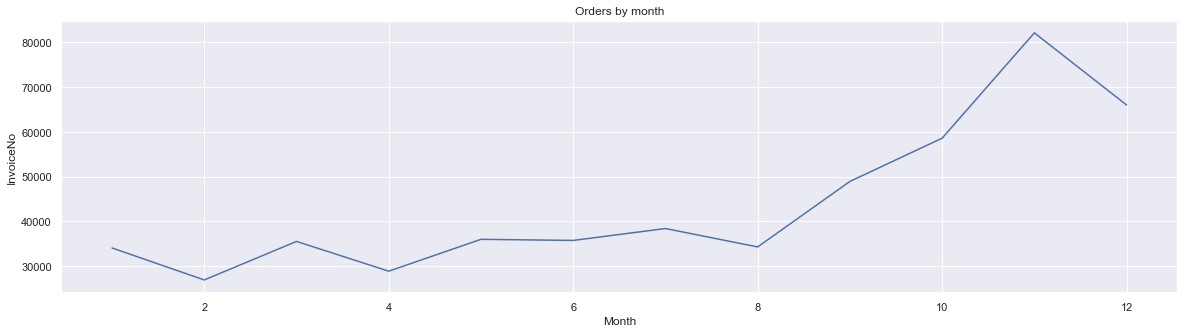

In [186]:
g = sns.lineplot(data = orders_by_month, x="Month",y="InvoiceNo")
plt.title("Orders by month")
plt.show()

## 15. How much money spent by each country?

In [187]:
money_by_country =  data[["Total bill","Country"]].groupby("Country").sum().round(2)

In [188]:
money_by_country

,Total bill
Country,
Australia,138453.81
Austria,10198.68
Bahrain,754.14
Belgium,41196.34
Brazil,1143.60
Canada,3666.38
Channel Islands,20440.54
Cyprus,13502.85
Czech Republic,826.74


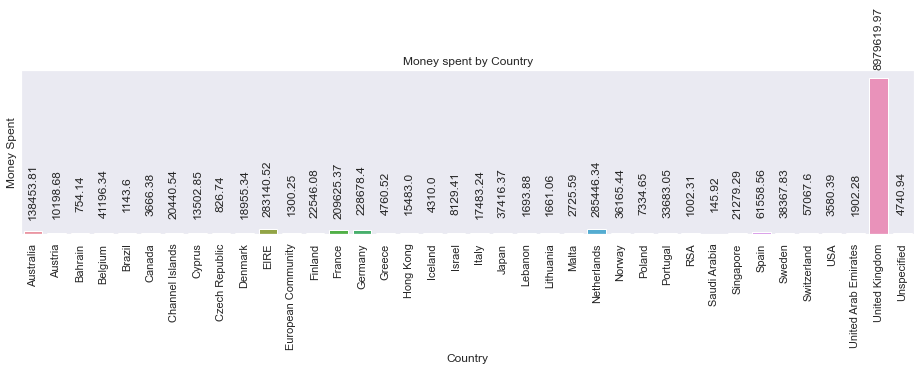

In [189]:
plt.figure(figsize=(16, 3))
splot = sns.barplot(data=money_by_country, x = money_by_country.index,y="Total bill")
for p in splot.patches:
    splot.annotate(p.get_height(), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 40), 
                   textcoords = 'offset points',rotation=90)
plt.title("Money spent by Country")
plt.xticks(rotation=90)
plt.yticks(ticks=[])
plt.ylabel("Money Spent")
plt.show()